사이킷런의 load_breast_cancer 데이터를 이용하여

n_neighbors를 1~11까지 변화시켜가며 트레인 정확도와

테스트 정확도 그래프를 확인하고 가장 적절한 k값을 판단하기

In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = sklearn.datasets.load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

clf = KNeighborsClassifier(n_neighbors=3)

rtrain = []
rtest = []

for i in range(1,12):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_label = clf.predict(X_test)
    rtrain.append(clf.score(X_train, y_train))
    rtest.append(clf.score(X_test, y_test))

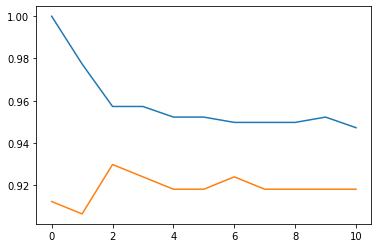

In [5]:
plt.plot(rtrain)
plt.plot(rtest)

tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

In [7]:
iris_dataset = load_iris()

In [9]:
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=58)

In [40]:
# 객체 생성
clf = DecisionTreeClassifier(max_depth=None)

In [41]:
# 모델링
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
print("훈련 세트 점수: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(clf.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.933


tree graph

conda install graphviz

conda install python-graphviz

In [43]:
import os
import sys

In [44]:
print('\n'.join(sys.path))

C:\Users\User\Documents\python-workspace\exp2019
C:\ProgramData\Anaconda3\python37.zip
C:\ProgramData\Anaconda3\DLLs
C:\ProgramData\Anaconda3\lib
C:\ProgramData\Anaconda3

C:\ProgramData\Anaconda3\lib\site-packages
C:\ProgramData\Anaconda3\lib\site-packages\win32
C:\ProgramData\Anaconda3\lib\site-packages\win32\lib
C:\ProgramData\Anaconda3\lib\site-packages\Pythonwin
C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\User\.ipython


In [45]:
os.environ['PATH'] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

In [46]:
# 그래프 생성
from sklearn.tree import export_graphviz
import graphviz  # 설치 필요

In [47]:
export_graphviz(clf, out_file="tree.dot", 
                feature_names=iris_dataset.feature_names, 
                class_names=iris_dataset.target_names, 
                filled=True)

In [48]:
with open('tree.dot') as f:
    dot_graph = f.read()

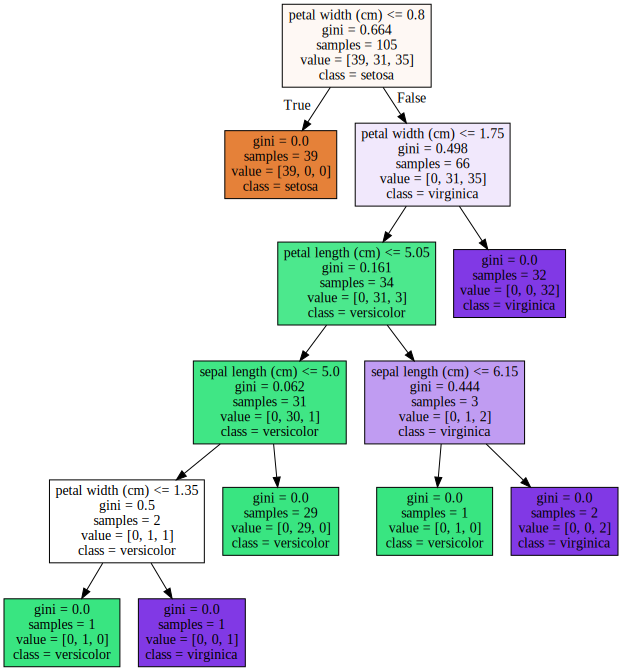

In [49]:
graphviz.Source(dot_graph)

In [50]:
clf.feature_importances_

array([0.0325534 , 0.        , 0.03159141, 0.93585518])

(-1, 4)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48320 missing from c

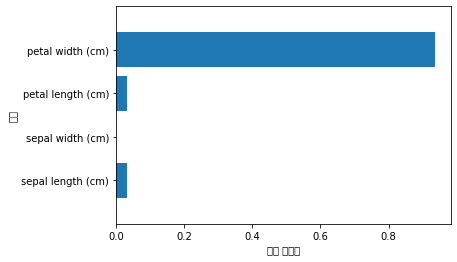

In [51]:
n_feature = iris_dataset.data.shape[1]
plt.barh(range(n_feature), clf.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), iris_dataset.feature_names)
plt.xlabel("변수 중요도",)
plt.ylabel("특성")
plt.ylim(-1, n_feature)

Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# toy 데이터 생성
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=3)

In [72]:
# 데이터 확인
X.shape

(100, 2)

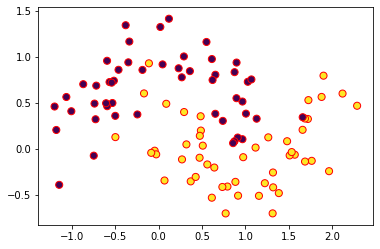

In [73]:
plt.scatter(X[:,0], X[:,1], edgecolors='red', s=50, c=y)

In [74]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [75]:
# 분할 데이터 확인
X_train.shape, y_train.shape

((80, 2), (80,))

In [76]:
# random forest 모델링을 위한 객체 생성
forest = RandomForestClassifier(n_estimators=5, random_state=5)

In [77]:
# 모델 적합
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [78]:
# 개별트리
from sklearn.tree import export_graphviz
import graphviz

In [79]:
import os
os.environ['PATH'] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz'

In [80]:
# 트리0
export_graphviz(forest.estimators_[0], out_file='rf0.dot', rounded=True, proportion=False, filled=True, precision=2)

In [81]:
with open('rf0.dot') as f1:
    dot_graph = f1.read()

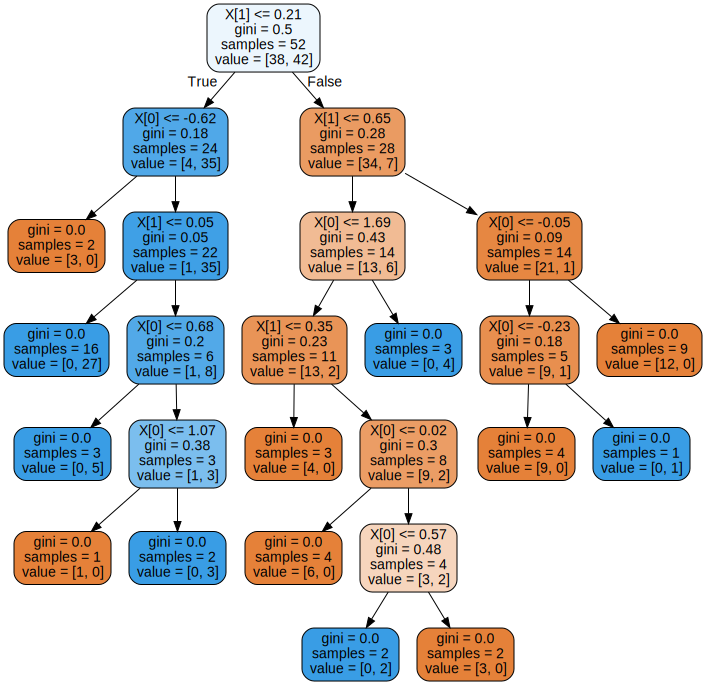

In [82]:
graphviz.Source(dot_graph)

In [83]:
iris_dataset = datasets.load_iris()

In [84]:
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1001)

In [85]:
# 모델링 객체 생성
forest_iris = RandomForestClassifier(n_estimators=10)

In [87]:
# 모델링
forest_iris.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
# 결과
print("훈련 세트 점수: {:.3f}".format(forest_iris.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(forest_iris.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.978


In [89]:
# 모델링(반복문)
train_accuracy = []
test_accuracy = []

n_estimators = range(5,201,5)

for n_estimator in n_estimators:
    # 모델 생성
    forest_iris = RandomForestClassifier(n_estimators = n_estimator)
    forest_iris.fit(X_train, y_train)
    
    # 훈련 정확도 저장
    train_accuracy.append(forest_iris.score(X_train, y_train))
    
    # 테스트 정확도
    test_accuracy.append(forest_iris.score(X_test, y_test))

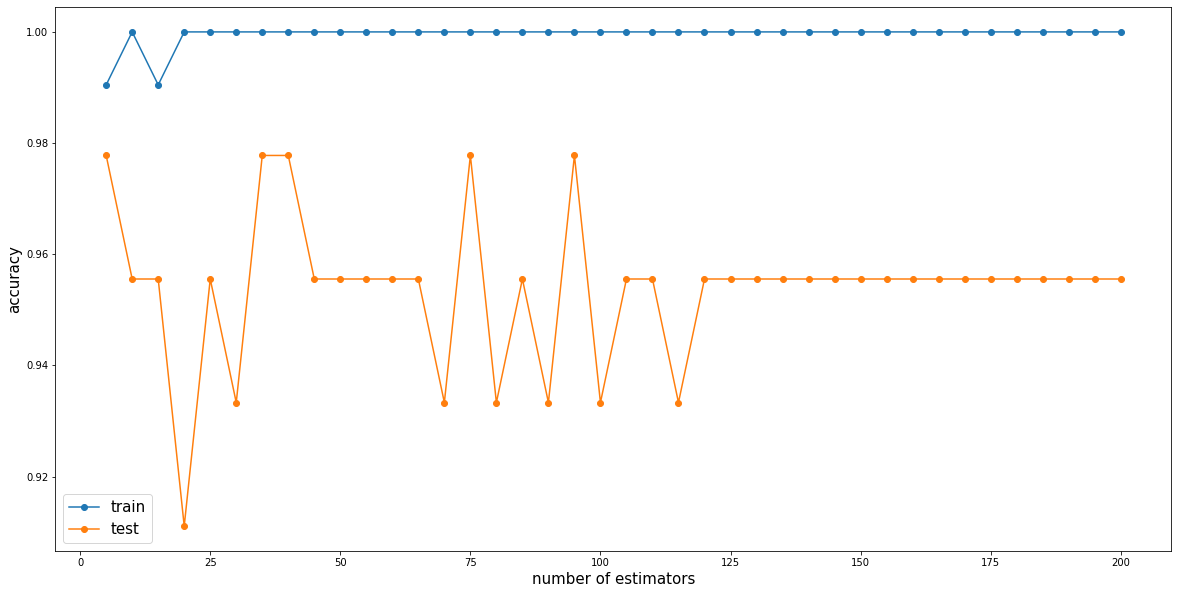

In [91]:
# estimaor 변화에 따른 결과
plt.figure(figsize=(20,10))
plt.plot(n_estimators, train_accuracy, label="train", marker='o')
plt.plot(n_estimators, test_accuracy, label="test", marker='o')
plt.ylabel("accuracy", fontsize=15)
plt.xlabel("number of estimators", fontsize=15)
plt.xticks()
plt.legend(fontsize=15)

In [101]:
cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

# 모델링, 객체 생성 -> max_feature=1
forest_cancer_minFeature = RandomForestClassifier(n_estimators=15, random_state=15, max_features=(len(cancer.feature_names)))

# 모델 적합
forest_cancer_minFeature.fit(X_train, y_train)

# 훈련 결과 확인
print("훈련 세트 점수: {:.3f}".format(forest_cancer_minFeature.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(forest_cancer_minFeature.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.974
